In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("laptop_data.csv")
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


# PREPROCESSING

In [3]:
df.info()
df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


0

In [4]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [6]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

# EDA

<Axes: >

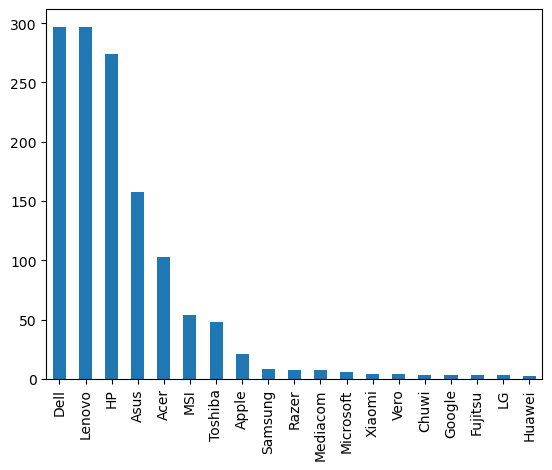

In [67]:
df['Company'].value_counts().plot(kind='bar')

<Axes: xlabel='Company', ylabel='Price'>

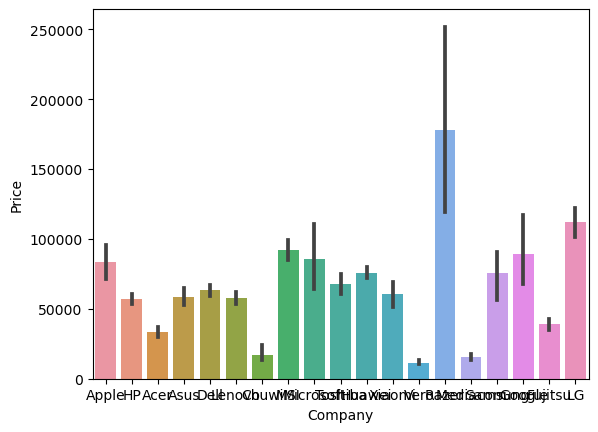

In [8]:
sns.barplot(x=df['Company'],y=df['Price'])
# plt.xsticks(rotation='vertical')

In [68]:
df['TypeName'].value_counts()  #.plot(kind='bar')

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    120
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

<Axes: xlabel='TypeName', ylabel='Price'>

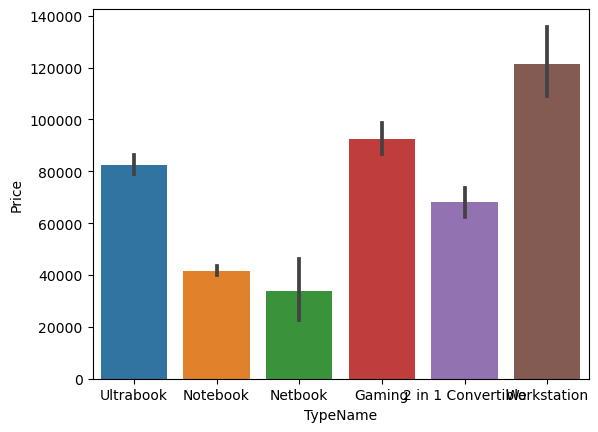

In [10]:
sns.barplot(x=df['TypeName'],y=df['Price'])

C:\Users\VISHI GUPTA\AppData\Local\Temp\ipykernel_15104\1439577752.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

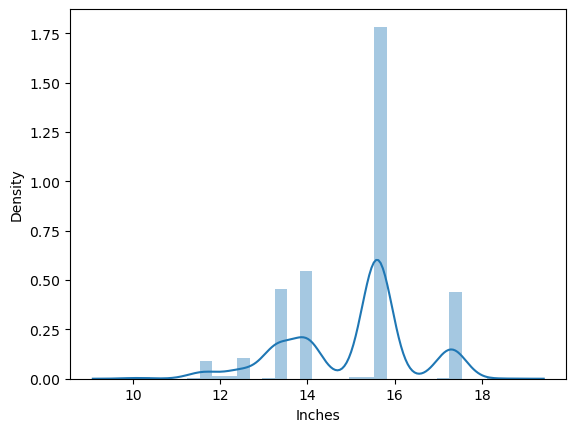

In [11]:
sns.distplot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

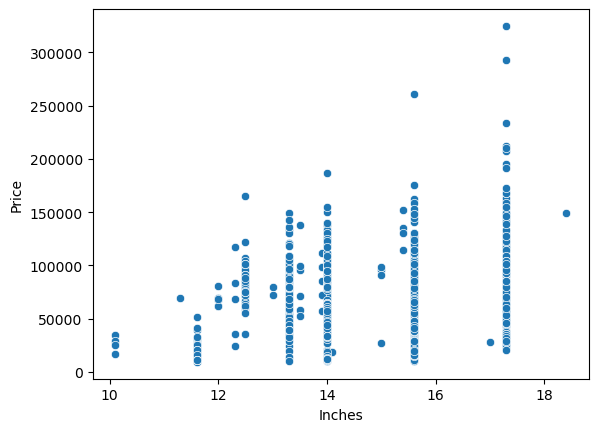

In [12]:
sns.scatterplot(x=df['Inches'],y=df['Price'])

In [13]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [14]:
df['TouchScreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

<Axes: xlabel='TouchScreen', ylabel='Price'>

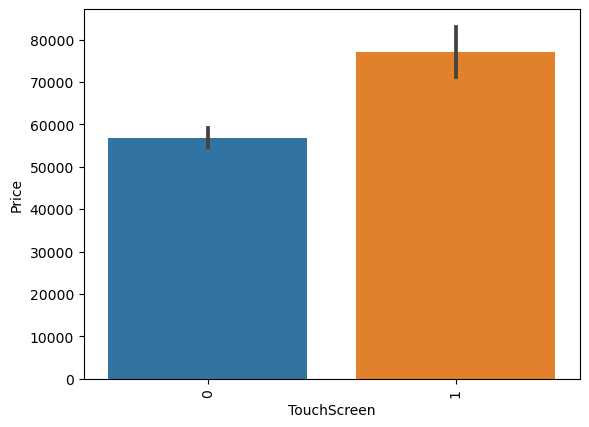

In [15]:
df['TouchScreen'].value_counts().plot(kind='bar')
sns.barplot(x=df['TouchScreen'],y=df['Price'])

<Axes: xlabel='IPS', ylabel='Price'>

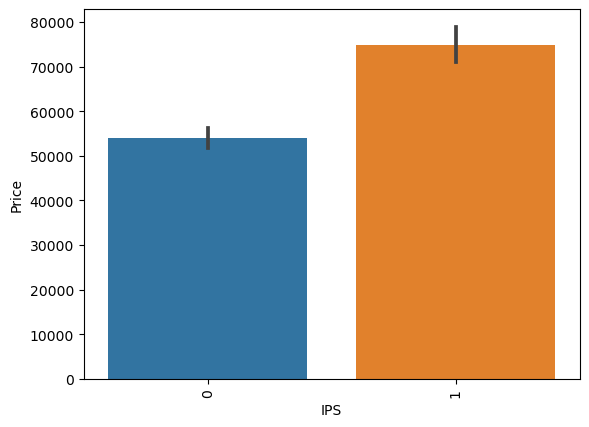

In [16]:
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
df['IPS'].value_counts().plot(kind='bar')
sns.barplot(x=df['IPS'],y=df['Price'])

In [17]:
new = df['ScreenResolution'].str.split('x',n=2,expand=True)
df['X_Res'] = new[0]
df['Y_Res'] = new[1]
df['X_Res'] = df['X_Res'].str.replace(',','').str.findall(r'(\d+.?\d+)').apply(lambda x:x[0])
df['X_Res'] = df['X_Res'].astype('int32')
df['Y_Res'] = df['Y_Res'].astype('int32')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_Res             1303 non-null   int32  
 14  Y_Res             1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [18]:
df.corr()['Price']

C:\Users\VISHI GUPTA\AppData\Local\Temp\ipykernel_15104\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_Res          0.556529
Y_Res          0.552809
Name: Price, dtype: float64

In [19]:
df['PPI'] = (((df['X_Res']**2) + (df['Y_Res']**2))**0.5/df['Inches']).astype('float')
df.corr()['Price']

C:\Users\VISHI GUPTA\AppData\Local\Temp\ipykernel_15104\1138745721.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_Res          0.556529
Y_Res          0.552809
PPI            0.473487
Name: Price, dtype: float64

In [20]:
df.drop(columns = ['Inches','X_Res','Y_Res'],inplace=True)

In [21]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [22]:
df['Cpu_Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [23]:
def fetch_processor(text):
    if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'
df['Cpu brand'] = df['Cpu_Name'].apply(fetch_processor)
df.head(1)

,Company,TypeName,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu_Name,Cpu brand
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu brand', ylabel='Price'>

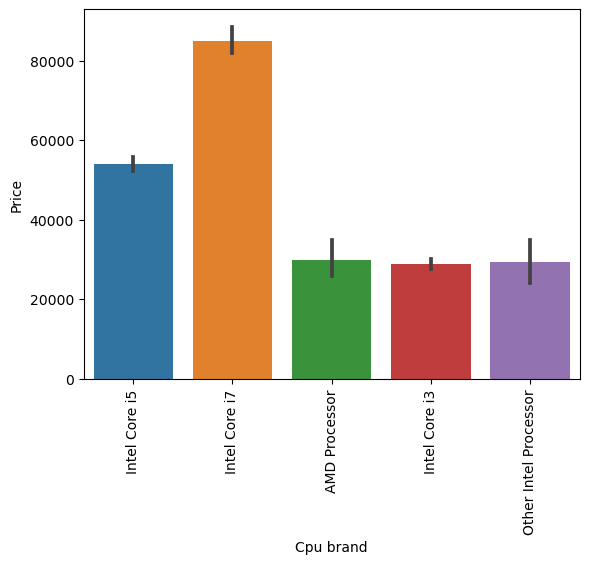

In [24]:
df['Cpu brand'].value_counts().plot(kind='bar')
sns.barplot(x=df['Cpu brand'],y=df['Price'])

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

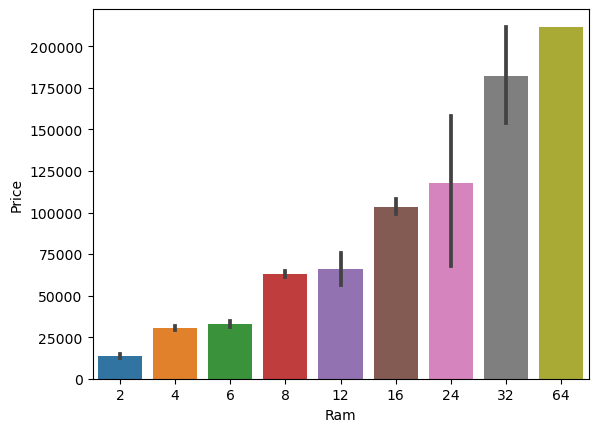

In [25]:
df['Ram'].value_counts()
sns.barplot(x=df['Ram'],y=df['Price'])
df['Memory'].value_counts()

In [26]:
df['Memory'] = df['Memory'].astype(str).replace('\.0','',regex=True)
df['Memory'] = df['Memory'].str.replace('GB','')
df['Memory'] = df['Memory'].str.replace('TB','000')
new = df['Memory'].str.split('+',n=1,expand=True)
df['first'] = new[0]
df['first'] = df['first'].str.strip()
df['second'] = new[1]
df['Layer1HDD'] = df['first'].apply(lambda x:1 if 'HDD' in x else 0)
df['Layer1SSD'] = df['first'].apply(lambda x:1 if 'SSD' in x else 0)
df['Layer1Hybrid'] = df['first'].apply(lambda x:1 if 'Hybrid' in x else 0)
df['Layer1Flash_Storage'] = df['first'].apply(lambda x:1 if 'Flash Storage' in x else 0)

df['first'] = df['first'].str.replace(r'\D','')
df['second'].fillna('0',inplace=True)
df['Layer2HDD'] = df['first'].apply(lambda x:1 if 'HDD' in x else 0)
df['Layer2SSD'] = df['first'].apply(lambda x:1 if 'SSD' in x else 0)
df['Layer2Hybrid'] = df['first'].apply(lambda x:1 if 'Hybrid' in x else 0)
df['Layer2Flash_Storage'] = df['first'].apply(lambda x:1 if 'Flash Storage' in x else 0)
df['second'] = df['second'].str.replace(r'\D','')
df['first'] = df['first'].astype(int)
df['second'] = df['second'].astype(int)

df['HDD'] = (df['first']*df['Layer1HDD'] + df['second']*df['Layer2HDD'])
df['SSD'] = (df['first']*df['Layer1SSD'] + df['second']*df['Layer2SSD'])
df['Hybrid'] = (df['first']*df['Layer1Hybrid'] + df['second']*df['Layer2Hybrid'])
df['Flash_Storage'] = (df['first']*df['Layer1Flash_Storage'] + df['second']*df['Layer2Flash_Storage'])
df.drop(columns = ['first','second','Layer1HDD','Layer1SSD','Layer1Hybrid','Layer1Flash_Storage','Layer2HDD','Layer2SSD','Layer2Hybrid','Layer2Flash_Storage','Memory'],inplace=True)
df.sample(2)

C:\Users\VISHI GUPTA\AppData\Local\Temp\ipykernel_15104\2672743413.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D','')
C:\Users\VISHI GUPTA\AppData\Local\Temp\ipykernel_15104\2672743413.py:19: FutureWarning: The default value of regex will change from True to False in a future version.
  df['second'] = df['second'].str.replace(r'\D','')


,Company,TypeName,ScreenResolution,Cpu,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu_Name,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
233,Dell,Notebook,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,Windows 10,1.60,45767.52,0,0,157.350512,Intel Core i5,Intel Core i5,0,256,0,0
1051,HP,Notebook,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,Nvidia GeForce 940MX,Windows 10,1.91,52161.12,0,1,141.211998,Intel Core i7,Intel Core i7,1000,0,0,0


In [27]:
df.corr()['Price']

C:\Users\VISHI GUPTA\AppData\Local\Temp\ipykernel_15104\815546952.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Ram              0.743007
Weight           0.210370
Price            1.000000
TouchScreen      0.191226
IPS              0.252208
PPI              0.473487
HDD             -0.380428
SSD              0.676202
Hybrid          -0.040147
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [28]:
df.drop(columns = ['Hybrid','Flash_Storage'],inplace=True)

In [29]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [30]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [31]:
df = df[df['Gpu brand'] != 'ARM']
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

<Axes: xlabel='Gpu brand', ylabel='Price'>

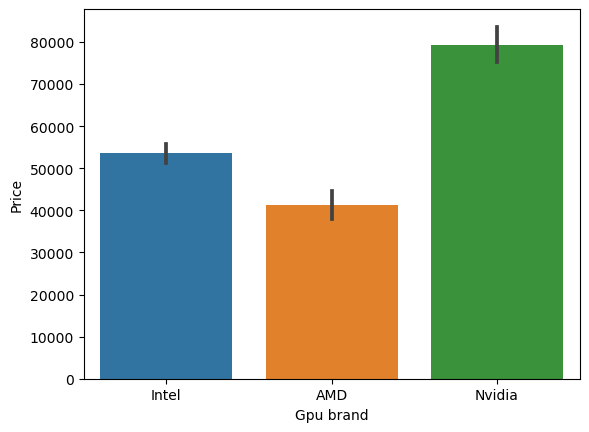

In [32]:
sns.barplot(x=df['Gpu brand'],y=df['Price'])

In [33]:
df.drop(columns = ['Gpu'],inplace=True)
# df

C:\Users\VISHI GUPTA\AppData\Local\Temp\ipykernel_15104\369771190.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['Gpu'],inplace=True)


In [34]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [35]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux/Android'
df['Os'] = df['OpSys'].apply(cat_os)

C:\Users\VISHI GUPTA\AppData\Local\Temp\ipykernel_15104\489743518.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Os'] = df['OpSys'].apply(cat_os)


In [36]:
df.head(1)

,Company,TypeName,ScreenResolution,Cpu,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu_Name,Cpu brand,HDD,SSD,Gpu brand,Os
0,Apple,Ultrabook,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5,0,128,Intel,Mac


In [37]:
df.drop(columns = ['OpSys','ScreenResolution','Cpu','Cpu_Name'],inplace=True)

C:\Users\VISHI GUPTA\AppData\Local\Temp\ipykernel_15104\2472211543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['OpSys','ScreenResolution','Cpu','Cpu_Name'],inplace=True)


<Axes: xlabel='Os', ylabel='Price'>

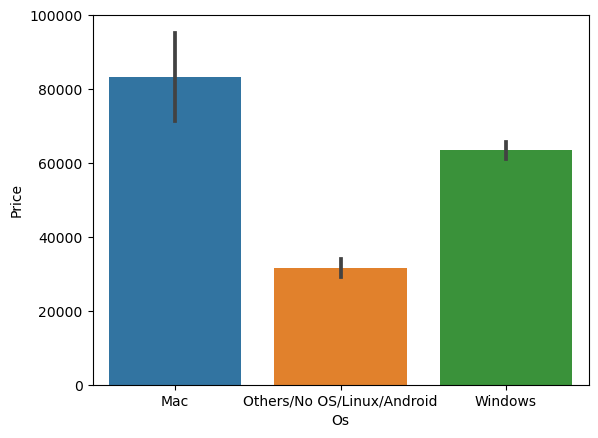

In [38]:
sns.barplot(x=df['Os'],y=df['Price'])

C:\Users\VISHI GUPTA\AppData\Local\Temp\ipykernel_15104\1125578356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

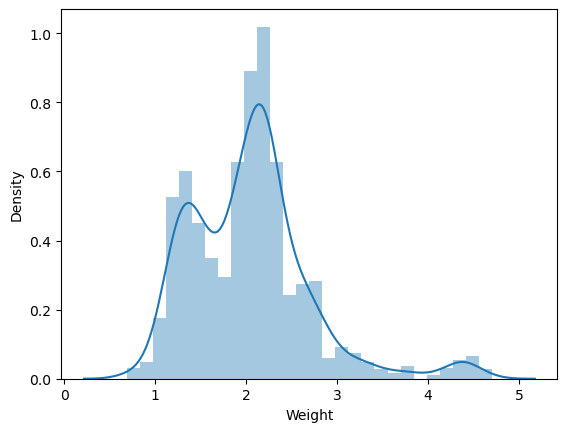

In [39]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

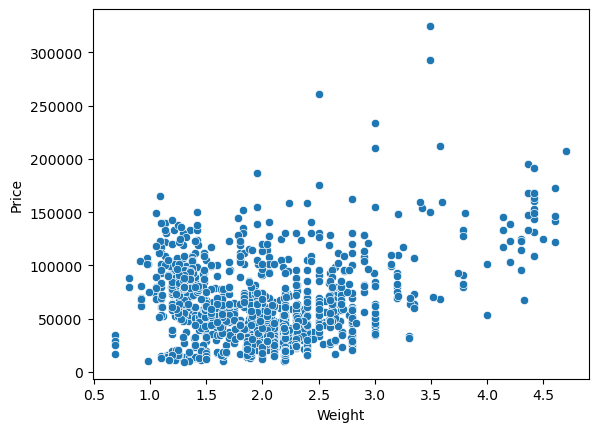

In [40]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

C:\Users\VISHI GUPTA\AppData\Local\Temp\ipykernel_15104\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

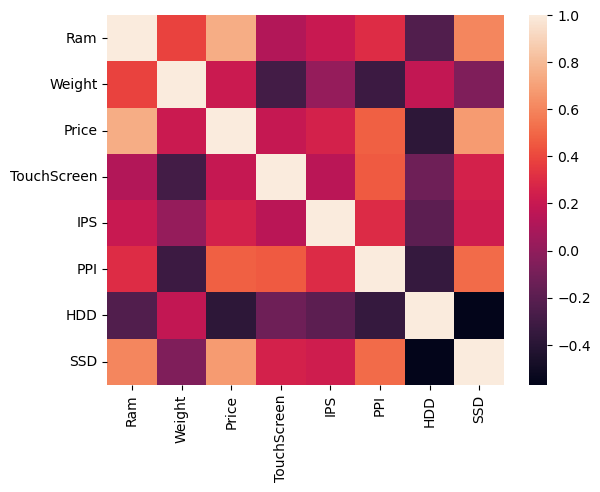

In [41]:
sns.heatmap(df.corr())

humara target column thoda skewed h.. toh hume uspe log transformation apply karni padegi

C:\Users\VISHI GUPTA\AppData\Local\Temp\ipykernel_15104\4215048856.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

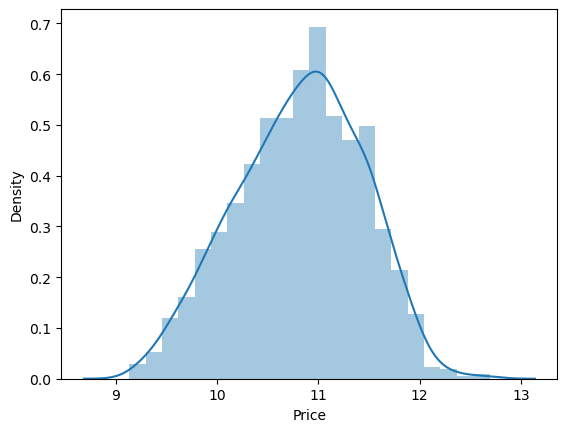

In [42]:
# sns.distplot(df['Price'])
sns.distplot(np.log(df['Price']))

In [43]:
X = df.drop(columns = ['Price'])
y = np.log(df['Price'])

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [45]:
# !pip install xgboost

In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [47]:
df.head(1)

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand,Os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac


# LinearRegression

In [48]:
# step1 = ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
# ],remainder='passthrough')

# step2 = LinearRegression()

# pipe = Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(X_train,y_train)

# y_pred = pipe.predict(X_test)

# print('R2 score',r2_score(y_test,y_pred))
# print('MAE',mean_absolute_error(y_test,y_pred))

# RIDGE REGRESSION

In [49]:
# step1 = ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
# ],remainder='passthrough')

# step2 = Ridge(alpha=12)

# pipe = Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(X_train,y_train)

# y_pred = pipe.predict(X_test)

# print('R2 score',r2_score(y_test,y_pred))
# print('MAE',mean_absolute_error(y_test,y_pred))

# LASSO REGRESSION

In [50]:
# step1 = ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
# ],remainder='passthrough')

# step2 = Lasso(alpha=0.001)

# pipe = Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(X_train,y_train)

# y_pred = pipe.predict(X_test)

# print('R2 score',r2_score(y_test,y_pred))
# print('MAE',mean_absolute_error(y_test,y_pred))

# KNN

In [51]:
# step1 = ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
# ],remainder='passthrough')

# step2 = KNeighborsRegressor(n_neighbors=3)

# pipe = Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(X_train,y_train)

# y_pred = pipe.predict(X_test)

# print('R2 score',r2_score(y_test,y_pred))
# print('MAE',mean_absolute_error(y_test,y_pred))

# DECISION TREE REGRESSOR 

In [52]:
# step1 = ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
# ],remainder='passthrough')

# step2 = DecisionTreeRegressor(max_depth=8)

# pipe = Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(X_train,y_train)

# y_pred = pipe.predict(X_test)

# print('R2 score',r2_score(y_test,y_pred))
# print('MAE',mean_absolute_error(y_test,y_pred))

# SVM

In [53]:
# step1 = ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
# ],remainder='passthrough')

# step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

# pipe = Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(X_train,y_train)

# y_pred = pipe.predict(X_test)

# print('R2 score',r2_score(y_test,y_pred))
# print('MAE',mean_absolute_error(y_test,y_pred))

# RANDOM FOREST

In [54]:
# Number of trees in random forest
n_estimators = [20,60,80,100,120,160]

# Number of features to consider at every split
max_features = [0.2,0.4,0.6,0.75,0.87,1.0]

# Maximum number of levels in tree
max_depth = [2,8,15,20,40,None]

# Number of samples
max_samples = [0.25,0.5,0.75,1.0]

In [55]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples
             }
print(param_grid)

{'n_estimators': [20, 60, 80, 100, 120, 160], 'max_features': [0.2, 0.4, 0.6, 0.75, 0.87, 1.0], 'max_depth': [2, 8, 15, 20, 40, None], 'max_samples': [0.25, 0.5, 0.75, 1.0]}


In [56]:
from sklearn.model_selection import GridSearchCV

rf_grid = GridSearchCV(estimator = RandomForestRegressor(), 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [57]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

# step2 = RandomForestRegressor(n_estimators=100,
#                               random_state=3,
#                               max_samples=0.5,
#                               max_features=0.75,
#                               max_depth=15)
step2 = rf_grid
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


C:\ProgramData\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8922006964346143
MAE 0.15124285586365221


# EXTRA TREES  

In [58]:
# step1 = ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
# ],remainder='passthrough')

# step2 = ExtraTreesRegressor(n_estimators=100,
#                               random_state=3,
#                               max_samples=0.5,
#                               bootstrap=True,
#                               max_features=0.75,
#                               max_depth=15)

# pipe = Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(X_train,y_train)

# y_pred = pipe.predict(X_test)

# print('R2 score',r2_score(y_test,y_pred))
# print('MAE',mean_absolute_error(y_test,y_pred))

# ADABOOST

In [59]:
# step1 = ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
# ],remainder='passthrough')

# step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

# pipe = Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(X_train,y_train)

# y_pred = pipe.predict(X_test)

# print('R2 score',r2_score(y_test,y_pred))
# print('MAE',mean_absolute_error(y_test,y_pred))

# GRADIENT BOOSTING

In [60]:
# step1 = ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
# ],remainder='passthrough')

# step2 = GradientBoostingRegressor(n_estimators=500)

# pipe = Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(X_train,y_train)

# y_pred = pipe.predict(X_test)

# print('R2 score',r2_score(y_test,y_pred))
# print('MAE',mean_absolute_error(y_test,y_pred))

# XGBOOST

In [61]:
# step1 = ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
# ],remainder='passthrough')

# step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

# pipe = Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(X_train,y_train)

# y_pred = pipe.predict(X_test)

# print('R2 score',r2_score(y_test,y_pred))
# print('MAE',mean_absolute_error(y_test,y_pred))

# VOTING REGRESSOR

In [62]:
# from sklearn.ensemble import VotingRegressor,StackingRegressor

# step1 = ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
# ],remainder='passthrough')


# rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
# gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
# xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
# et = ExtraTreesRegressor(n_estimators=100,bootstrap=True,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10)

# step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

# pipe = Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(X_train,y_train)

# y_pred = pipe.predict(X_test)

# print('R2 score',r2_score(y_test,y_pred))
# print('MAE',mean_absolute_error(y_test,y_pred))

# STACKING

In [63]:
# from sklearn.ensemble import VotingRegressor,StackingRegressor

# step1 = ColumnTransformer(transformers=[
#     ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
# ],remainder='passthrough')


# estimators = [
#     ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
#     ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
#     ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
# ]

# step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

# pipe = Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(X_train,y_train)

# y_pred = pipe.predict(X_test)

# print('R2 score',r2_score(y_test,y_pred))
# print('MAE',mean_absolute_error(y_test,y_pred))

In [64]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [69]:
df['Ram']

8     619
4     374
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: Ram, dtype: int64